# Execute the code below
You will get a passenger list of the titanic.

In [2]:
import pandas as pd

In [3]:
link = "https://raw.githubusercontent.com/LucaSainteCroix/teaching-resources/main/exercises-data/titanic.csv"
df_titanic = pd.read_csv(link)
df_titanic['Survived'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


# Data preparation

What are the "type" of each column? Are there non-numeric columns?

In [4]:
# What are the "type" of each column?

df_titanic.dtypes

Survived                    object
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

Then, make a first exploration (pairplots, correlation heatmaps, etc...) of the dataset

c:\Users\benoi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


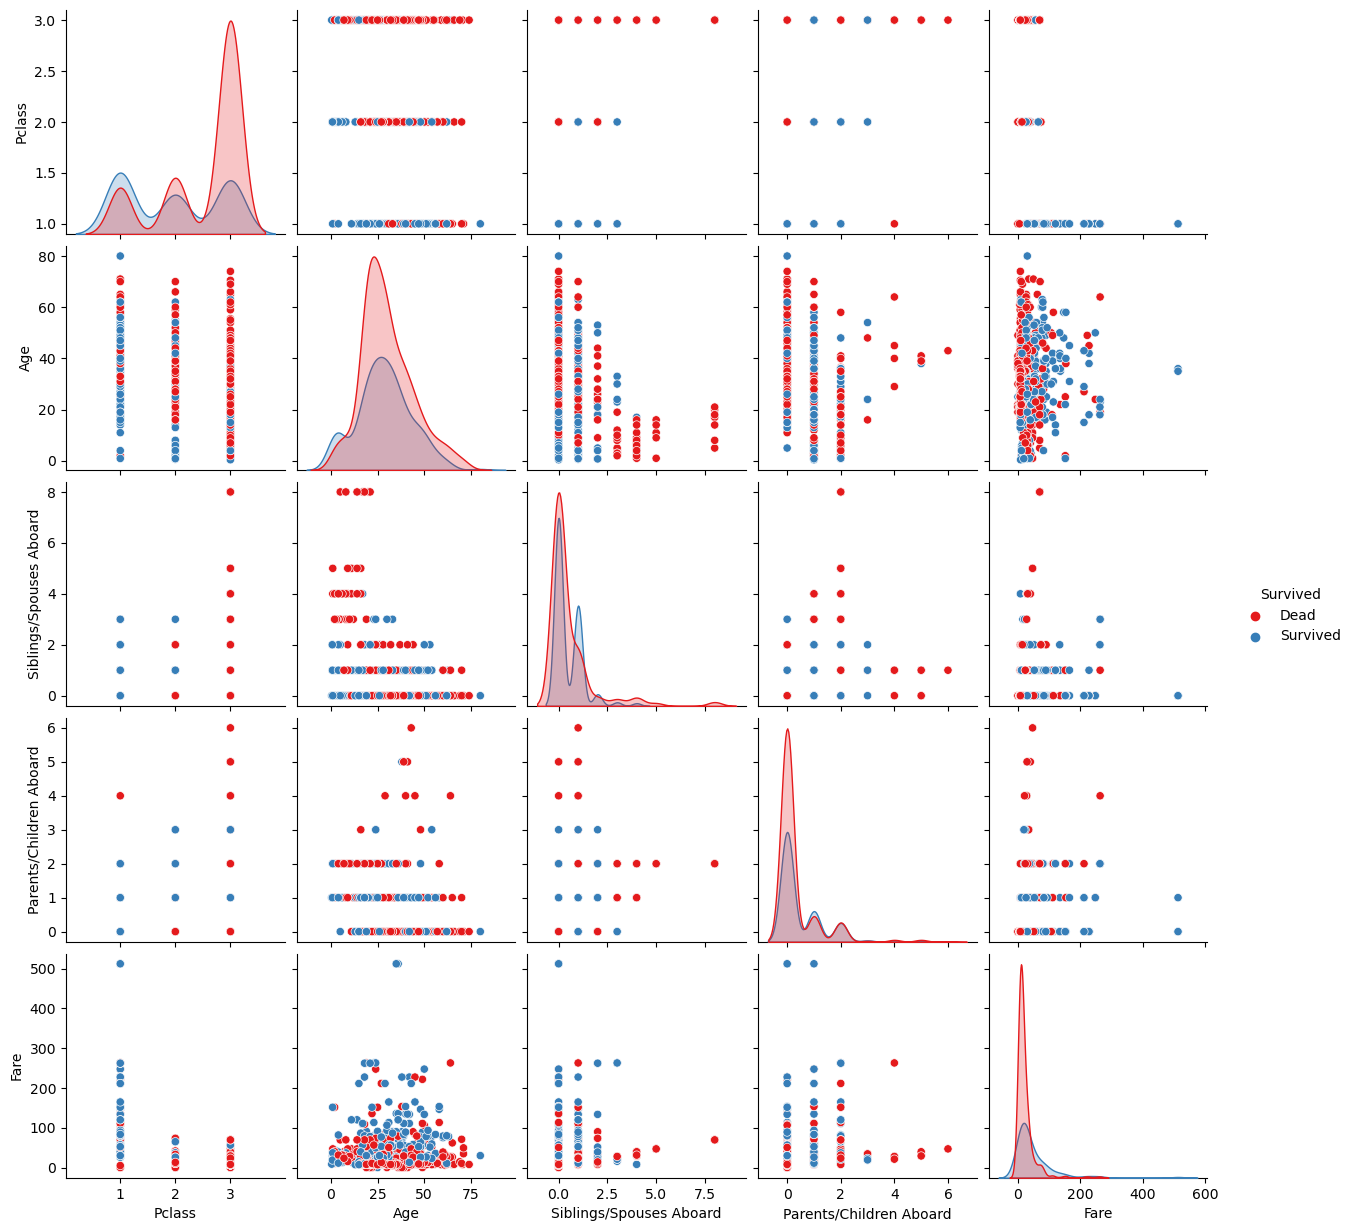

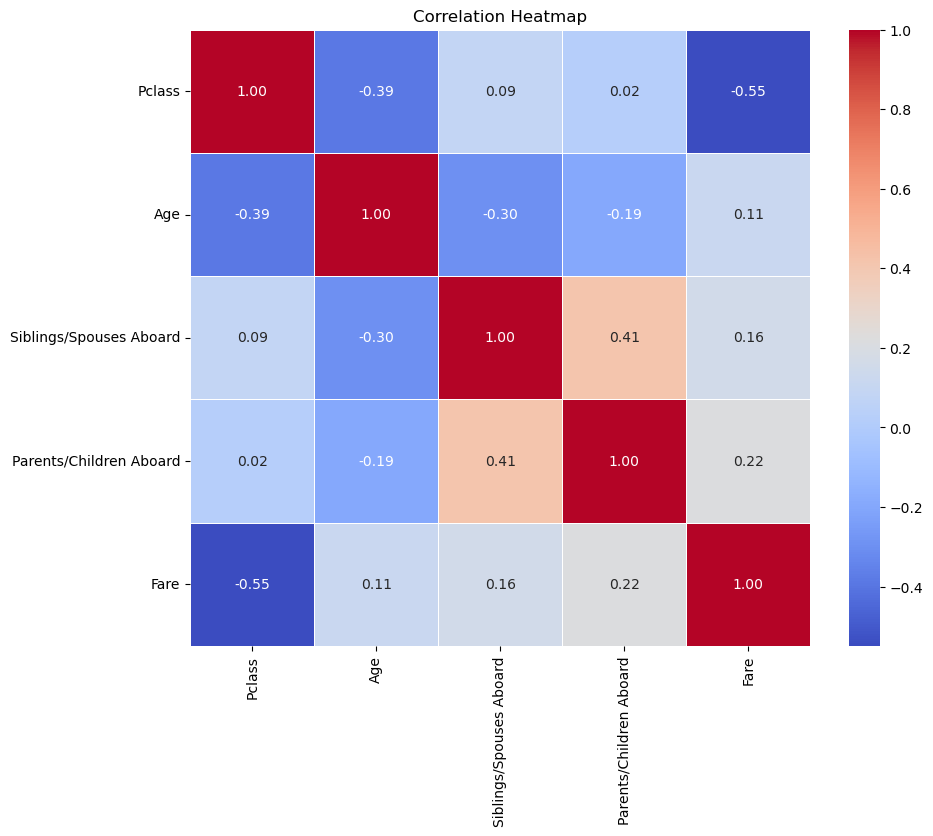

In [10]:
# First exploration:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df_titanic.select_dtypes(include='number')

# Pairplots
sns.pairplot(df_titanic, hue='Survived', palette='Set1')
plt.show()

# Correlation heatmap for numeric columns only
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


You are looking for Jack. How many people named Jack on board?

In [36]:
# How many people named Jack on board?
jack_count = df_titanic[df_titanic['Name'].str.contains('Jack ', case=False)]['Name'].count()
jack_count

0

# Logistic regression

Today, in this challenge, you have an extraordinary power: you can travel in time to try to save some passengers.
You obviously wanted to save Jack. But you didn't find his name on the list. He probably travels under a false name...
Too bad, thanks to this trip, you will still try to save as many people as possible. To do this, you have to identify the people who are most probably going to die.

- Select features (X) with only numeric values, and without "Survived" column
- Select "Survived" column as target (y)
- Split your data with **random_state = 36**
- Train a logistic regression
- Print the accuracy score on the train set and on the test set. Is there overfitting?
- Print the Confusion Matrix on the test set
- How many iterations were needed to train this model?

In [22]:
print(df_titanic['Survived'])


0          Dead
1      Survived
2      Survived
3      Survived
4          Dead
         ...   
882        Dead
883    Survived
884        Dead
885    Survived
886        Dead
Name: Survived, Length: 887, dtype: object


In [29]:
# It's up to you:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

X = df_titanic.select_dtypes(include='number')
# X = df_titanic.select_dtypes(include='number').drop(df_titanic.columns[df_titanic.columns.str.match('Survived', case=False)], axis=1)

y = df_titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

train_accuracy = accuracy_score(y_train, logreg.predict(X_train))
test_accuracy = accuracy_score(y_test, logreg.predict(X_test))

print(f"Accuracy on the train set: {train_accuracy}")
print(f"Accuracy on the test set: {test_accuracy}")

conf_matrix = confusion_matrix(y_test, logreg.predict(X_test))
print(f"Confusion Matrix: {conf_matrix}")

num_iterations = logreg.n_iter_[0]
print(f"Number of iterations needed to train the model: {num_iterations}")


Accuracy on the train set: 0.7150916784203103
Accuracy on the test set: 0.6404494382022472
Confusion Matrix: [[85 17]
 [47 29]]
Number of iterations needed to train the model: 62


# Model improvement

With your fancy time machine, you can, and you will save all the people that the model will predict as dead. But you won't save people predicted as "survived" (because it's not necessary). So change the weights of the classes to be very careful: your goal is to save all the people at risk. So, in this case, it's better to have "actual survived" peopple predicted as death, because you'll save them anyway. Otherwise, "actual death" predicted as survived won't be saved by your time machine.
- Change the weight of the classes
- Fit the model on train set
- Print the accuracy score on the train set and on the test set
- Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived".

In [30]:
# It's up to you to save everybody:
# Fit the model with adjusted class weights
logreg_weighted = LogisticRegression(class_weight={'Survived': 10, 'Dead': 1})
logreg_weighted.fit(X_train, y_train)

# Print accuracy scores
train_accuracy_weighted = accuracy_score(y_train, logreg_weighted.predict(X_train))
test_accuracy_weighted = accuracy_score(y_test, logreg_weighted.predict(X_test))

print("Train Accuracy (Weighted):", train_accuracy_weighted)
print("Test Accuracy (Weighted):", test_accuracy_weighted)

# Confusion Matrix
conf_matrix_weighted = confusion_matrix(y_test, logreg_weighted.predict(X_test))
print("Confusion Matrix (Weighted):")
print(conf_matrix_weighted)


Train Accuracy (Weighted): 0.4146685472496474
Test Accuracy (Weighted): 0.43820224719101125
Confusion Matrix (Weighted):
[[ 3 99]
 [ 1 75]]


# People most at risk

You are looking for people most at risk.
- Compute the prediction probabilities **on your test set**
- Which column is about "survived" probability?
- Among the previous prediction probability array, select only the column corresponding to the "Survived" probability
- Display the passengers by sorting  most likely to survive first (`sorted_values()` method?)

In [32]:
# It's up to you:
# Calculer les probabilités de prédiction sur l'ensemble de test
probabilites_prediction = logreg_weighted.predict_proba(X_test)

# Trouver l'indice de la colonne correspondant à la probabilité de "Survived"
indice_colonne_probabilite_survivant = list(logreg_weighted.classes_).index('Survived')

# Sélectionner la colonne correspondant à la probabilité de "Survived"
probabilites_survivant = probabilites_prediction[:, indice_colonne_probabilite_survivant]

# Créer un DataFrame avec les noms des passagers et leurs probabilités de survie correspondantes
passagers_probabilites_df = pd.DataFrame({'Passager': X_test.index, 'Probabilité de Survie': probabilites_survivant})

# Afficher les passagers triés par la probabilité de survie
passagers_probabilites_tries = passagers_probabilites_df.sort_values(by='Probabilité de Survie', ascending=False)
print(passagers_probabilites_tries)



     Passager  Probabilité de Survie
34        303               0.996112
67        733               0.994426
73        309               0.992119
123       547               0.991980
130        27               0.988919
..        ...                    ...
56        412               0.512324
49        128               0.498147
28        859               0.493452
134       480               0.280378
126       508               0.248425

[178 rows x 2 columns]


# Bonus - Model improvement, under constraint

Your time travel boss tells you that there's a budget cut. You now can only save 120 people max. Not one more.

If your model predicts as "dead" someone who would have survived in reality. You then "save" that person, who would have survived even without your time-traveling help. And you take the place of someone who could have been saved. That's not optimal.

Select the 120 people with the highest probability of dying. Of these, how many actually survived?

In [51]:
# It's up to you:
passagers_a_risque = passagers_probabilites_tries.head(120)

indices_passagers_a_risque = passagers_a_risque['Passager']

indices_passagers_a_risque = indices_passagers_a_risque[indices_passagers_a_risque < len(y_test)]

labels_passagers_a_risque = y_test.iloc[indices_passagers_a_risque]

nombre_survivants_par_risque = labels_passagers_a_risque.count()

print(f"Nombre de survivants parmi les personnes à risque : {nombre_survivants_par_risque}")


Nombre de survivants parmi les personnes à risque : 21


# Bonus - More predictions

Does the Reverend "Rev. Juozas Montvila" have a better chance of survival than "Mrs. William (Margaret Norton) Rice"?
- Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)
- Make a prediction with probability for this 2 people
- Which one has a better chance to survive?


In [53]:
# Bonus - More predictions

# Filtrer le DataFrame initial pour obtenir uniquement les 2 lignes avec les 2 personnes mentionnées
personnes_a_comparer = df_titanic.loc[df_titanic['Name'].isin(["Rev. Juozas Montvila", "Mrs. William (Margaret Norton) Rice"]), X.columns]

# Réinitialiser l'index pour permettre l'accès à la colonne 'Name'
personnes_a_comparer = personnes_a_comparer.reset_index(drop=True)

# Calculer les probabilités de prédiction pour ces 2 personnes
probabilites_prediction_personnes = logreg_weighted.predict_proba(personnes_a_comparer)

# Créer un DataFrame avec les noms des personnes et leurs probabilités de survie correspondantes
personnes_probabilites_df = pd.DataFrame({'Personne': ["Rev. Juozas Montvila", "Mrs. William (Margaret Norton) Rice"], 'Probabilité de Survie': probabilites_prediction_personnes[:, 1]})

print(personnes_probabilites_df)


                              Personne  Probabilité de Survie
0                 Rev. Juozas Montvila               0.815501
1  Mrs. William (Margaret Norton) Rice               0.900203
